# import libries

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

# reading data

In [ ]:
df_train=pd.read_csv("D:/studies/depi/ottawa/gp/resource/dataset/mitbih_train.csv", header=None)
df_test=pd.read_csv("D:/studies/depi/ottawa/gp/resource/dataset/mitbih_test.csv", header=None)

# show data training and testing

In [ ]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
#shape of data
print("shape of training data",df_train.shape)
print("shape of testing data ",df_test.shape)

shape of training data (87554, 188)
shape of testing data  (21892, 188)


In [ ]:
#getting info about training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [ ]:
#getting info about testing data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


classes
N : Normal
S : Supraventricular premature beat
V : Premature ventricular contraction
F : Fusion of ventricular and normal beat
Q : Unclassifiable beat

Classes:['N':0,'s':1,'v':2,'f':3 ,'Q':4]

# Data analysis and Data visualization

In [ ]:
#check the null in train data
df_train.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [ ]:
#check the null in test data
df_test.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [ ]:
#check the inf in train data
df_train.isin([np.inf, -np.inf])

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87550,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87551,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87552,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#check the inf in test data
df_test.isin([np.inf, -np.inf])

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21888,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21889,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21890,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#plotting
def plot_sample(data_class,title):
    plt.plot(data_class.iloc[0, :], color = 'b')
    plt.xlabel("time")
    plt.ylabel("beat of heart")
    plt.title(title)
    plt.show()

In [ ]:
#each class
def sample_class_data(data):
    data_class_0=data[data[187]==0]
    data_class_1=data[data[187]==1]
    data_class_2=data[data[187]==2]
    data_class_3=data[data[187]==3]
    data_class_4=data[data[187]==4]
    return data_class_0,data_class_1,data_class_2,data_class_3,data_class_4

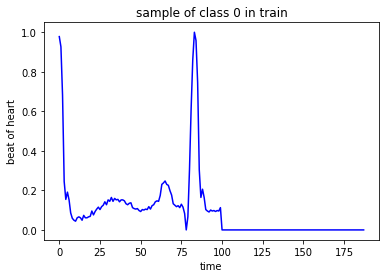

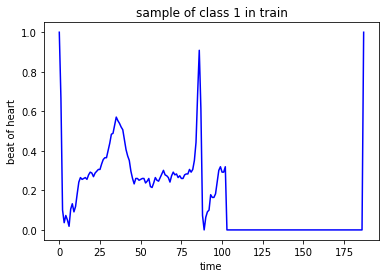

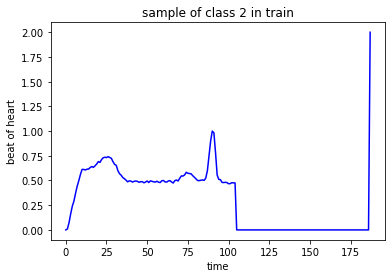

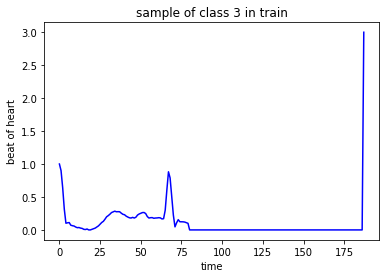

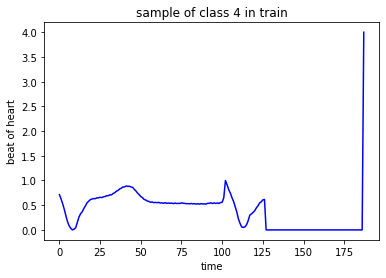

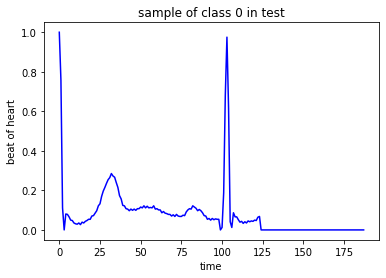

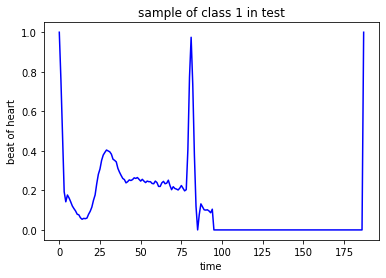

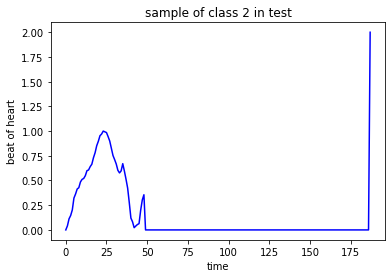

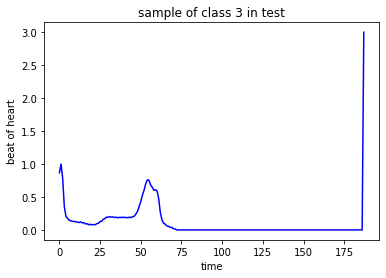

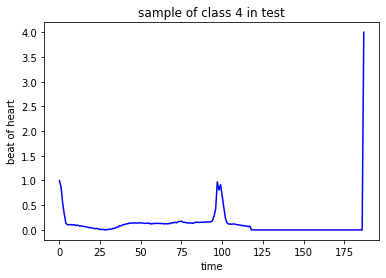

In [ ]:
train_class_0,train_class_1,train_class_2,train_class_3,train_class_4=sample_class_data(df_train)
test_class_0,test_class_1,test_class_2,test_class_3,test_class_4=sample_class_data(df_test)
#plot sample in training data for each classes
plot_sample(train_class_0,"sample of class 0 in train")
plot_sample(train_class_1,"sample of class 1 in train")
plot_sample(train_class_2,"sample of class 2 in train")
plot_sample(train_class_3,"sample of class 3 in train")
plot_sample(train_class_4,"sample of class 4 in train")
#plot sample in testing data for each classes
plot_sample(test_class_0,"sample of class 0 in test")
plot_sample(test_class_1,"sample of class 1 in test")
plot_sample(test_class_2,"sample of class 2 in test")
plot_sample(test_class_3,"sample of class 3 in test")
plot_sample(test_class_4,"sample of class 4 in test")

In [ ]:
def count_plot_class(data,title):
    print(data[187].value_counts())
    x_1 = np.arange(5)
    plt.bar(x_1, data[187].value_counts(),color='b')
    plt.xticks(x_1,[0,1,2,3,4])
    plt.xlabel("label")
    plt.ylabel("distribution")
    plt.title(title)
    plt.legend(["label"],bbox_to_anchor =(0.6, 1.2))
    plt.show()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


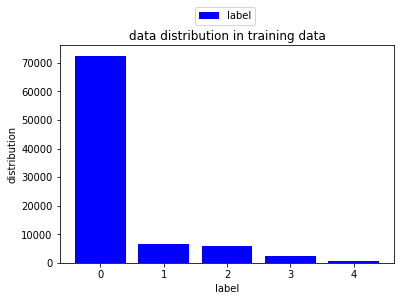

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


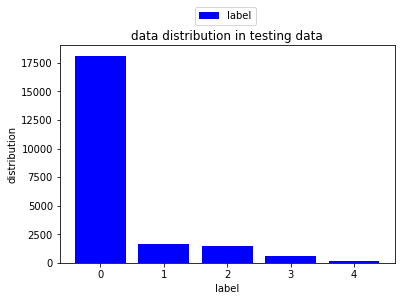

In [ ]:
#plot count label in training and testing data
count_plot_class(df_train,"data distribution in training data")
count_plot_class(df_test,"data distribution in testing data")

from value count the classes the previous graph show the implance data between classes in training and testing data so we apply oversampling smote on the training data.

# Data preprocessing

In [ ]:
#split train data into feature and target
x_train=df_train.iloc[:,0:187]
y_train=df_train.iloc[:,187]

In [ ]:
#split test data into feature and target
x_test=df_test.iloc[:,0:187]
y_test=df_test.iloc[:,187]

In [ ]:
list(x_test.iloc[0,0:187])

[1.0,
 0.7582644820213318,
 0.11157024651765823,
 0.0,
 0.08057851344347002,
 0.07851240038871765,
 0.06611569970846176,
 0.04958677664399147,
 0.047520659863948815,
 0.03512396663427353,
 0.03099173493683338,
 0.028925620019435883,
 0.03512396663427353,
 0.026859503239393234,
 0.039256200194358826,
 0.03512396663427353,
 0.043388430029153824,
 0.047520659863948815,
 0.05371900647878647,
 0.05371900647878647,
 0.07024793326854706,
 0.0723140463232994,
 0.08471074700355531,
 0.09710744023323059,
 0.12190082669258115,
 0.13223139941692352,
 0.1694214940071106,
 0.19628098607063293,
 0.2148760259151459,
 0.23553718626499176,
 0.2541322410106659,
 0.26446279883384705,
 0.2851239740848541,
 0.27272728085517883,
 0.2665289342403412,
 0.23966942727565765,
 0.2148760259151459,
 0.1735537201166153,
 0.1570248007774353,
 0.12396693974733353,
 0.12190082669258115,
 0.10743801295757292,
 0.10537189990282057,
 0.09710744023323059,
 0.10537189990282057,
 0.09917355328798294,
 0.10537189990282057,
 0

In [ ]:
#applying smote oversampling
oversample = SMOTE()
x__train,y__train= oversample.fit_resample(x_train, y_train)
df__train=x__train.copy()
df__train[187]=y__train

1.0    72471
3.0    72471
4.0    72471
2.0    72471
0.0    72471
Name: 187, dtype: int64


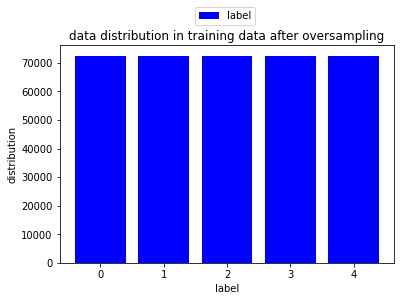

In [ ]:
#after oversampling y__train value counts 
count_plot_class(df__train,"data distribution in training data after oversampling")

# applying model CatBoostClassifier

In [ ]:
#appling CatBoostClassifier 
def model(clf_c,x__train,y__train,x_test,y_test):
    clf_c.fit(x__train, y__train)
    y_pred_c=clf_c.predict(x_test)
    #print(f1_score(y_test,y_pred_c))
    print("accuracy for catBoost",accuracy_score(y_test, y_pred_c)*100)
    print("f1_score for catBoost for each class ",f1_score(y_test, y_pred_c, average=None))
    print("f1_score for catBoost by micro ",f1_score(y_test, y_pred_c, average='micro'))
    print("f1_score for catBoost by weighted ",f1_score(y_test, y_pred_c, average='weighted'))
    plot_confusion_matrix(clf_c, x_test, y_test)
    print(classification_report(y_test, y_pred_c))
    return y_pred_c

accuracy for catBoost 97.41458066873744
f1_score for catBoost for each class  [0.98608879 0.76149915 0.93992448 0.72351421 0.97890819]
f1_score for catBoost by micro  0.9741458066873744
f1_score for catBoost by weighted  0.9748608851187074
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     18118
         1.0       0.72      0.80      0.76       556
         2.0       0.93      0.95      0.94      1448
         3.0       0.62      0.86      0.72       162
         4.0       0.98      0.98      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.85      0.92      0.88     21892
weighted avg       0.98      0.97      0.97     21892



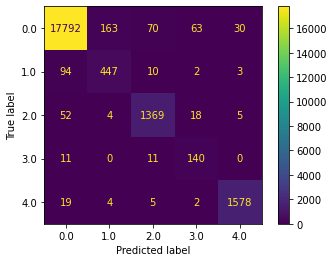

In [ ]:
clf_c = CatBoostClassifier(iterations=2000,verbose=0,learning_rate=0.08,random_state=0)
y_pred_c=model(clf_c,x__train,y__train,x_test,y_test)                        

class 1 and class 3 is less than true predicted

In [ ]:
#save model way_2
import pickle
pickle.dump(clf_c, open('D:/studies/depi/ottawa/gp/coding/catboost_.sav','wb'))

In [ ]:
#load model way_2
loaded_model=pickle.load(open('D:/studies/depi/ottawa/gp/coding/catboost_.sav', 'rb'))

# deployment

In [ ]:
from flask import Flask, request, jsonify, render_template
flask_app = Flask(__name__)
loaded_model=pickle.load(open('D:/studies/depi/ottawa/gp/coding/catboost_.sav', 'rb'))
@flask_app.route("/")
def Home():
#    return render_template("index.html")
    return render_template("D:/studies/depi/ottawa/gp/coding/ind.html")
@flask_app.route("/predict", methods = ["POST"])
def predict():
    ECG__features=[]
    features_ECG=[]
    ECG_features = [str(x) for x in request.form.values()]
    features=ECG_features[0].split(" ")
    for a in features:
        ECG__features.append(float(a))
    prediction = loaded_model.predict(ECG__features)
    return render_template("D:/studies/depi/ottawa/gp/coding/ind.html", prediction_ECG = "class of ECG is {}".format(prediction))
if __name__ == "__main__":
    flask_app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [02/Mar/2022 23:38:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Mar/2022 23:38:28] "POST /predict HTTP/1.1" 200 -


# applying CNN model

In [ ]:
#import libraries
import tensorflow
from keras.models import Sequential
from keras.models import load_model
from keras import layers, models
from keras.layers import Conv1D,MaxPooling1D,Flatten,BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
#print shape x_train,x_test,y_train,y_test
print("training after oversampling",x__train.shape)
print("classes in training after oversampling",y__train.shape)
print("testing",x_test.shape)
print("classes in testing",y_test.shape)

training after oversampling (362355, 187)
classes in training after oversampling (362355,)
testing (21892, 187)
classes in testing (21892,)


In [ ]:
#convert to numpy array
def conv_array(x__train,y__train,x_test,y_test):
    x___train=np.array(x__train)
    y___train=np.array(y__train)
    y___train =to_categorical(y___train, 5)
    x___test=np.array(x_test)
    y___test=np.array(y_test)
    y___test =to_categorical(y___test, 5)
    return x___train,y___train,x___test,y___test

In [ ]:
#call convert function
x___train,y___train,x___test,y___test=conv_array(x__train,y__train,x_test,y_test)

In [ ]:
#reshape training and testing data
def Reshape_train_test(x__train,x__test):
    x__train=x__train.reshape(len(x__train), x__train.shape[1], 1)
    x__test=x__test.reshape(len(x__test), x__test.shape[1], 1)
    return x__train,x__test

In [ ]:
#call Reshape function
x___train,x___test=Reshape_train_test(x___train,x___test)

In [ ]:
#print shape training and testing data
print("training after oversampling after reshaping",x___train.shape)
print("classes in training after oversampling",y___train.shape)
print("testing after reshaping",x___test.shape)
print("classes in testing",y___test.shape)

training after oversampling after reshaping (362355, 187, 1)
classes in training after oversampling (362355, 5)
testing after reshaping (21892, 187, 1)
classes in testing (21892, 5)


In [ ]:
def model_cnn():
#    set_random_seed(1)
    model=Sequential()
    model.add(Conv1D(filters=64, kernel_size=(6,), activation='relu', padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3,), strides=2, padding='same'))
    model.add(Conv1D(filters=64, kernel_size=(6,), activation='relu', padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3,), strides=2, padding='same'))
    model.add(Conv1D(filters=64, kernel_size=(6,), activation='relu',padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3,), strides=2, padding='same'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model_cnn=model_cnn()
model_cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_17 (Conv1D)          (None, 187, 64)           448       
                                                                 
 batch_normalization_15 (Bat  (None, 187, 64)          256       
 chNormalization)                                                
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 94, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_18 (Conv1D)          (None, 94, 64)            24640     
                                                                 
 batch_normalization_16 (Bat  (None, 94, 64)           256       
 chNormalization)                                                
                                                      

In [ ]:
#print layer name
for layer in model_cnn.layers:
  print(layer.name)

conv1d_17
batch_normalization_15
max_pooling1d_15
conv1d_18
batch_normalization_16
max_pooling1d_16
conv1d_19
batch_normalization_17
max_pooling1d_17
flatten_5
dense_15
dense_16
dense_17


In [ ]:
#print name layer and shape filter
layer__name=[]
for layer in model_cnn.layers:
    if 'conv' not in layer.name:
        continue
    layer__name.append((layer.name))
    filters_layer, biases_layer = layer.get_weights()
    print(layer.name, filters_layer.shape)

conv1d_17 (6, 1, 64)
conv1d_18 (6, 64, 64)
conv1d_19 (6, 64, 64)


In [ ]:
#fit cnn model
#es=EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)
result_cnn=model_cnn.fit(x___train,y___train,epochs=10,batch_size=50,validation_data=(x___test, y___test))

Epoch 1/10
7248/7248 [==============================] - 497s 68ms/step - loss: 0.0837 - accuracy: 0.9711 - val_loss: 0.0774 - val_accuracy: 0.9826
Epoch 2/10
7248/7248 [==============================] - 526s 73ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.1072 - val_accuracy: 0.9767
Epoch 3/10
7248/7248 [==============================] - 499s 69ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0936 - val_accuracy: 0.9785
Epoch 4/10
7248/7248 [==============================] - 500s 69ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0986 - val_accuracy: 0.9806
Epoch 5/10
7248/7248 [==============================] - 541s 75ms/step - loss: 0.0134 - accuracy: 0.9959 - val_loss: 0.1012 - val_accuracy: 0.9808
Epoch 6/10
7248/7248 [==============================] - 542s 75ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0985 - val_accuracy: 0.9840
Epoch 7/10
7248/7248 [==============================] - 503s 69ms/step - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0

In [ ]:
#evaluate cnn model
test_score_cnn = model_cnn.evaluate(x___test, y___test,verbose=1)
print('Test loss:', test_score_cnn[0])
print('Test accuracy:', test_score_cnn[1])

685/685 [==============================] - 6s 9ms/step - loss: 0.1165 - accuracy: 0.9836
Test loss: 0.11646588146686554
Test accuracy: 0.9836469888687134


Text(0, 0.5, 'Losses')

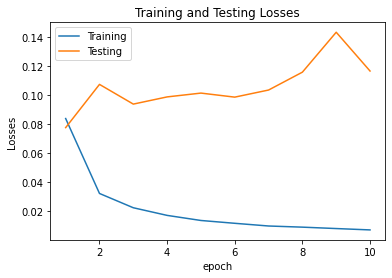

In [ ]:
#plot loss in traning and testing 
epochs = range(1, len(result_cnn.history['val_loss']) + 1)
plt.plot(epochs,result_cnn.history['loss'])
plt.plot(epochs,result_cnn.history['val_loss'])
plt.legend(['Training', 'Testing'])
plt.title('Training and Testing Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')

Text(0, 0.5, 'accuracy')

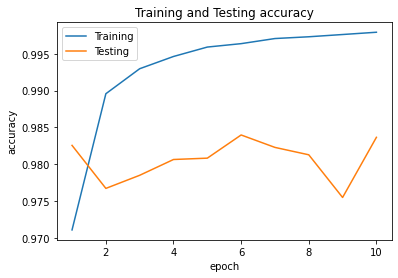

In [ ]:
#plot accuracy in traning and testing 
plt.plot(epochs,result_cnn.history['accuracy'])
plt.plot(epochs,result_cnn.history['val_accuracy'])
plt.legend(['Training', 'Testing'])
plt.title('Training and Testing accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

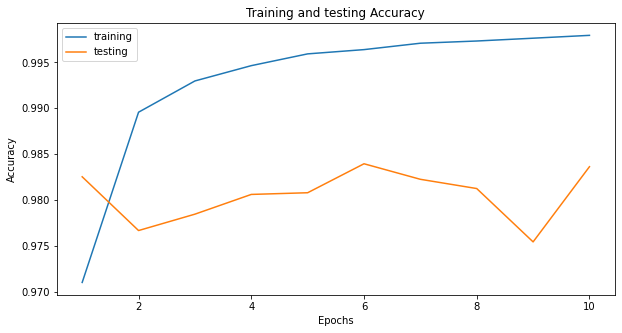

In [ ]:
#plt.figure(figsize=(10, 5))
#plt.title('Training and testing Accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy')
#plt.plot(epochs,result_cnn.history['accuracy'], label='training')
#plt.plot(epochs,result_cnn.history['val_accuracy'], label='testing')
#plt.legend()

In [ ]:
#predit x_test
def pred(model_cnn,x___test,y___test):
    y_pred_cnn=model_cnn.predict(x___test)
    y__pred__cnn=np.argmax(y_pred_cnn, axis=1)
    y_true_cnn=np.argmax(y___test,axis=1)
    print("predict label unique",np.unique(y__pred__cnn))
    print("true label unique",np.unique(y_true_cnn))
    print("accuracy for cnn model",accuracy_score(y_true_cnn, y__pred__cnn)*100)
    print("f1_score for catBoost for each class ",f1_score(y_true_cnn, y__pred__cnn, average=None))
    print("f1_score for catBoost by micro ",f1_score(y_true_cnn, y__pred__cnn, average='micro'))
    print("f1_score for catBoost by weighted ",f1_score(y_true_cnn, y__pred__cnn, average='weighted'))
    cm_cnn=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true_cnn,y__pred__cnn))
    cm_cnn.plot()
    return y__pred__cnn

predict label unique [0 1 2 3 4]
true label unique [0 1 2 3 4]
accuracy for cnn model 98.36469943358304
f1_score for catBoost for each class  [0.99168899 0.83185841 0.95997215 0.77871148 0.99033365]
f1_score for catBoost by micro  0.9836469943358305
f1_score for catBoost by weighted  0.9838562836372347


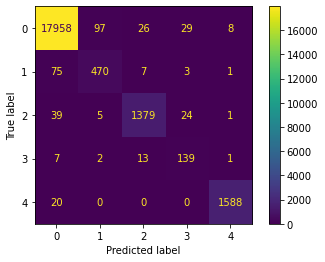

In [ ]:
#call function prediction
y__pred__cnn=pred(model_cnn,x___test,y___test)

In [ ]:
#save model cnn
model_cnn.save('D:/studies/depi/ottawa/gp/coding/cnn.h5')